# New Section

In [1]:
#from google.colab import drive


In [2]:
#drive.mount('/content/drive')

In [3]:
#pip install numpy


In [4]:
#pip install matplotlib


In [5]:
#pip install opencv-python


In [6]:
#pip install tensorflow

In [7]:
#pip install tqdm

# New Section

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow
import tensorflow.keras.models
from tqdm import tqdm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [9]:
DATADIR = "Dataset"
CATEGORIES = ["helmet", "withouthelmet"]

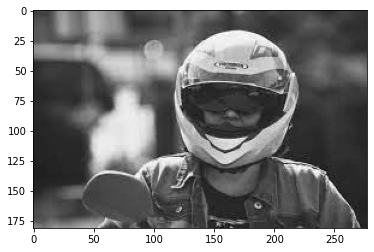

[[ 97  97  98 ...  68  68  67]
 [ 83  84  84 ...  68  68  67]
 [ 75  75  76 ...  68  67  67]
 ...
 [133 132 131 ...  48  54  53]
 [140 139 138 ...  49  55  55]
 [140 139 138 ...  51  61  58]]
(181, 278)


In [10]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break
    break  

print(img_array)
print(img_array.shape)
IMG_SIZE = 50

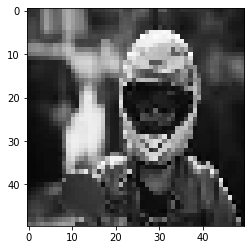

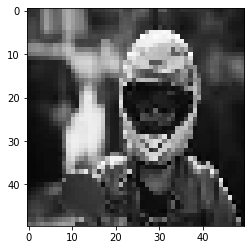

In [11]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            
create_training_data()

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 160.67it/s]


In [13]:
print(len(training_data))

16


In [14]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


0
1
0
0
1
1
1
0
0
0
[[[[108]
   [139]
   [136]
   ...
   [113]
   [139]
   [161]]

  [[ 77]
   [105]
   [112]
   ...
   [104]
   [117]
   [123]]

  [[ 74]
   [ 92]
   [105]
   ...
   [100]
   [104]
   [106]]

  ...

  [[114]
   [125]
   [138]
   ...
   [ 83]
   [ 83]
   [ 88]]

  [[110]
   [116]
   [111]
   ...
   [ 74]
   [ 72]
   [ 56]]

  [[153]
   [158]
   [174]
   ...
   [ 70]
   [ 62]
   [ 56]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:


        
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y = np.array(y)
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=20,
                      validation_split=0.3,
                      callbacks=[tensorboard])
  




1-conv-32-nodes-0-dense-1654151850
Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.6890 - accuracy: 0.6364 - val_loss: 0.8158 - val_accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 410ms/step - loss: 0.6145 - accuracy: 0.6364 - val_loss: 0.7823 - val_accuracy: 0.2000
Epoch 3/20
1/1 [==============================] - 0s 416ms/step - loss: 0.5455 - accuracy: 0.8182 - val_loss: 0.7315 - val_accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 0s 355ms/step - loss: 0.4866 - accuracy: 0.9091 - val_loss: 0.7324 - val_accuracy: 0.2000
Epoch 5/20
1/1 [==============================] - 0s 430ms/step - loss: 0.4339 - accuracy: 0.9091 - val_loss: 0.7810 - val_accuracy: 0.2000
Epoch 6/20
1/1 [==============================] - 0s 354ms/step - loss: 0.3833 - accuracy: 0.9091 - val_loss: 0.8477 - val_accuracy: 0.2000
Epoch 7/20
1/1 [==============================] - 0s 360ms/step - loss: 0.3398 - accuracy: 1.0000 - val_loss: 0.8938 - val_accur

Epoch 19/20
1/1 [==============================] - 0s 443ms/step - loss: 0.5005 - accuracy: 0.8182 - val_loss: 0.7713 - val_accuracy: 0.4000
Epoch 20/20
1/1 [==============================] - 1s 1s/step - loss: 0.4815 - accuracy: 0.8182 - val_loss: 0.7790 - val_accuracy: 0.4000
1-conv-64-nodes-0-dense-1654151884
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6903 - accuracy: 0.4545 - val_loss: 0.8416 - val_accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 192ms/step - loss: 0.5763 - accuracy: 0.6364 - val_loss: 0.6673 - val_accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 0s 150ms/step - loss: 0.4954 - accuracy: 0.9091 - val_loss: 0.7488 - val_accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 0s 166ms/step - loss: 0.4186 - accuracy: 0.9091 - val_loss: 0.9064 - val_accuracy: 0.2000
Epoch 5/20
1/1 [==============================] - 0s 151ms/step - loss: 0.3640 - accuracy: 0.9091 - val_loss: 0.9390 - val_accura

Epoch 17/20
1/1 [==============================] - 0s 201ms/step - loss: 0.2947 - accuracy: 1.0000 - val_loss: 1.1884 - val_accuracy: 0.4000
Epoch 18/20
1/1 [==============================] - 0s 198ms/step - loss: 0.2688 - accuracy: 0.9091 - val_loss: 1.1389 - val_accuracy: 0.4000
Epoch 19/20
1/1 [==============================] - 0s 248ms/step - loss: 0.2441 - accuracy: 1.0000 - val_loss: 1.3826 - val_accuracy: 0.4000
Epoch 20/20
1/1 [==============================] - 0s 203ms/step - loss: 0.2208 - accuracy: 0.9091 - val_loss: 1.2622 - val_accuracy: 0.4000
1-conv-128-nodes-0-dense-1654151906
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6943 - accuracy: 0.5455 - val_loss: 0.8619 - val_accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 205ms/step - loss: 0.5474 - accuracy: 0.6364 - val_loss: 0.6050 - val_accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 0s 206ms/step - loss: 0.4652 - accuracy: 0.8182 - val_loss: 0.7505 - val_

Epoch 12/20
1/1 [==============================] - 0s 153ms/step - loss: 0.5873 - accuracy: 0.6364 - val_loss: 0.7925 - val_accuracy: 0.2000
Epoch 13/20
1/1 [==============================] - 0s 402ms/step - loss: 0.5718 - accuracy: 0.7273 - val_loss: 0.7919 - val_accuracy: 0.4000
Epoch 14/20
1/1 [==============================] - 0s 262ms/step - loss: 0.5540 - accuracy: 0.7273 - val_loss: 0.7996 - val_accuracy: 0.4000
Epoch 15/20
1/1 [==============================] - 1s 925ms/step - loss: 0.5342 - accuracy: 0.7273 - val_loss: 0.8048 - val_accuracy: 0.4000
Epoch 16/20
1/1 [==============================] - 1s 1s/step - loss: 0.5135 - accuracy: 0.7273 - val_loss: 0.7915 - val_accuracy: 0.4000
Epoch 17/20
1/1 [==============================] - 0s 355ms/step - loss: 0.4917 - accuracy: 0.8182 - val_loss: 0.8148 - val_accuracy: 0.4000
Epoch 18/20
1/1 [==============================] - 0s 321ms/step - loss: 0.4658 - accuracy: 0.8182 - val_loss: 0.7989 - val_accuracy: 0.4000
Epoch 19/20
1/1 

1/1 [==============================] - 0s 317ms/step - loss: 0.4415 - accuracy: 0.8182 - val_loss: 0.8834 - val_accuracy: 0.4000
Epoch 7/20
1/1 [==============================] - 0s 277ms/step - loss: 0.3601 - accuracy: 1.0000 - val_loss: 0.8957 - val_accuracy: 0.4000
Epoch 8/20
1/1 [==============================] - 0s 282ms/step - loss: 0.2964 - accuracy: 0.9091 - val_loss: 2.9403 - val_accuracy: 0.4000
Epoch 9/20
1/1 [==============================] - 0s 284ms/step - loss: 0.8721 - accuracy: 0.6364 - val_loss: 0.7280 - val_accuracy: 0.6000
Epoch 10/20
1/1 [==============================] - 0s 388ms/step - loss: 0.3379 - accuracy: 0.8182 - val_loss: 0.4979 - val_accuracy: 0.6000
Epoch 11/20
1/1 [==============================] - 0s 267ms/step - loss: 0.5973 - accuracy: 0.6364 - val_loss: 0.9799 - val_accuracy: 0.4000
Epoch 12/20
1/1 [==============================] - 0s 287ms/step - loss: 0.2277 - accuracy: 1.0000 - val_loss: 1.8963 - val_accuracy: 0.4000
Epoch 13/20
1/1 [===========

Epoch 4/20
1/1 [==============================] - 0s 142ms/step - loss: 0.6637 - accuracy: 0.8182 - val_loss: 0.7166 - val_accuracy: 0.4000
Epoch 5/20
1/1 [==============================] - 0s 149ms/step - loss: 0.6534 - accuracy: 0.7273 - val_loss: 0.7403 - val_accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 0s 135ms/step - loss: 0.6425 - accuracy: 0.6364 - val_loss: 0.7636 - val_accuracy: 0.2000
Epoch 7/20
1/1 [==============================] - 0s 151ms/step - loss: 0.6307 - accuracy: 0.6364 - val_loss: 0.7728 - val_accuracy: 0.4000
Epoch 8/20
1/1 [==============================] - 0s 150ms/step - loss: 0.6159 - accuracy: 0.6364 - val_loss: 0.7674 - val_accuracy: 0.4000
Epoch 9/20
1/1 [==============================] - 0s 177ms/step - loss: 0.5983 - accuracy: 0.7273 - val_loss: 0.7524 - val_accuracy: 0.4000
Epoch 10/20
1/1 [==============================] - 0s 222ms/step - loss: 0.5786 - accuracy: 0.7273 - val_loss: 0.7453 - val_accuracy: 0.4000
Epoch 11/20
1/1 [==

Epoch 19/20
1/1 [==============================] - 0s 356ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 2.5477 - val_accuracy: 0.2000
Epoch 20/20
1/1 [==============================] - 0s 263ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 2.5493 - val_accuracy: 0.2000
3-conv-128-nodes-2-dense-1654152052
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6935 - accuracy: 0.5455 - val_loss: 0.7036 - val_accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 296ms/step - loss: 0.6786 - accuracy: 0.7273 - val_loss: 0.7556 - val_accuracy: 0.2000
Epoch 3/20
1/1 [==============================] - 0s 297ms/step - loss: 0.6613 - accuracy: 0.5455 - val_loss: 0.7795 - val_accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 0s 320ms/step - loss: 0.6352 - accuracy: 0.6364 - val_loss: 0.7572 - val_accuracy: 0.4000
Epoch 5/20
1/1 [==============================] - 0s 283ms/step - loss: 0.5859 - accuracy: 0.7273 - val_loss: 0.7553 - val_ac

In [ ]:
model.save('64x3-CNN.model')

In [ ]:
import cv2
import sys


def detectFace(img):
    
    imagePath = img
    #imagePath = sys.argv[1]
    cascPath = "haarcascade_frontalface_default.xml"

    faceCascade = cv2.CascadeClassifier(cascPath)

    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    print("Results {0} Peoples on bike!".format(len(faces)))

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("Without helmet found", image)
    cv2.waitKey(5000)
    return 0


In [6]:
#import cv2
#import tensorflow as tf
#import smtplib

#Res_CATEGORIES = ["Wearing Helmet", "Not Wearing Helmet"]


#def prepare(filepath):
 #   IMG_SIZE = 50  # 50 in txt-based
  #  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  #  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  #  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


#model = tf.keras.models.load_model("64x3-CNN.model")

#prediction = model.predict([prepare(file)])
#print(prediction)  # will be a list in a list.
#print(Res_CATEGORIES[int(prediction[0][0])])

In [ ]:
import numpy as np
import cv2
import  imutils
import smtplib

In [ ]:
def detectPlate():
    # Read the image file
    image = cv2.imread(file)

    # Resize the image - change width to 500
    
    image = imutils.resize(image, width=500)

    # Display the original image
    cv2.imshow("Original Image", image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow("1 - Grayscale Conversion", gray)
    

# Noise removal with iterative bilateral filter(removes noise while preserving edges)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    cv2.imshow("2 - Bilateral Filter", gray)
    # Find Edges of the grayscale image
    edged = cv2.Canny(gray, 170, 200)
    cv2.imshow("4 - Canny Edges", edged)
        # Find contours based on Edges
    (new, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
    NumberPlateCnt = None #we currently have no Number plate contour

    # loop over our contours to find the best possible approximate contour of number plate
    count = 0
    for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            if len(approx) == 4:  # Select the contour with 4 corners
                NumberPlateCnt = approx #This is our approx Number Plate Contour
                break


    # Drawing the selected contour on the original image
    cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
    cv2.imshow("Final Image With Number Plate Detected", image)
    cv2.waitKey(50000)

In [ ]:
import pandas as pd
from  tkinter import *
from tkinter import filedialog
root = Tk()

def get_file_name():
        global root
        root.filename =  filedialog.askopenfilename(initialdir = "C:/",title = "choose your image",filetypes = (("image files","*.jpeg"),("all files","*.*")))
        print (root.filename)
        root.withdraw()
        return root.filename
    


In [ ]:
file = get_file_name()
imagePath = file
if detectFace(imagePath) ==0:
    detectPlate()
    #sendMail()
else:
    print("Person Weared Helmet");        
    

In [ ]:
withouthelmetfine = 500

In [2]:
#pip install twilio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
from twilio.rest import Client

account = ""
token = ""
client = Client(account, token)

message = client.messages.create(to="", from_="",
                                 body="This is Message from Helmet Detection System You have not weared helmet a fine of Rs. 500 is applied")